### מטלה 2

#### שם המגיש : נתנאל פרחי 318590890

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### סעיף 1

In [88]:
datafile='matala2_cosmetics_2019-Nov.csv'
## סעיף 1
# קריאת הקובץ
df = pd.read_csv(datafile, low_memory=False)
# נסדר את הדאטה לפי היוזר ותאריך הביקור באתר
df = df.sort_values(['user_id', 'event_time'])


# אעבוד על דאטה קטן בכדי לא להעמיס
df = df[0:1000000].copy()
# נטפל בסוג העמודה ונמיר אותה לעמודה של זמן
df['event_time'] = pd.to_datetime(df['event_time'])

# עבור כל יוזר , אחשב את הזמן בשניות מהביקור הנוכחי לביקור הקודם
df['duration_to_next_event'] = df.groupby('user_id')['event_time'].transform(lambda x: x.shift(-1) - x)

# במידה וליוזר יש רק ביקור אחד או שזהו  הביקור האחרון שלו, נרצה לבצע השמה של 0
def handle_single_or_last_visit(duration, user_count):
    if user_count == 1 or pd.isna(duration):
        return 0
    return duration.total_seconds()

# נבצע השמה 
df['duration_to_next_event'] = df.groupby('user_id').apply(lambda group: group['duration_to_next_event'].apply(handle_single_or_last_visit, user_count=len(group))).reset_index(level=0, drop=True)

df

## סעיף 2

In [124]:
# סעיף 2

# אייצר עמודת עזר , שבה יש את הזמן בימים עד האירוע הבא

df["duration_days"]=df["duration_to_next_event"]/86400
df["funnel_number"]= None
df['funnel_number'] = df['duration_days'].apply(lambda x: 1 if x > 5 else 0)
df['cumulative_time_diff'] = df.groupby('user_id')['funnel_number'].cumsum()
vector=df["cumulative_time_diff"].shift(1)
vector.fillna(0,inplace=True)
vector=vector+1
df["funnel_number"]=vector.astype(int)
del df['cumulative_time_diff']
df


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_days,funnel_number,funnel_index
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,0.000000,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,88998.0,1.030069,1,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,0.000243,1,2
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,0.000833,1,2
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,0.000324,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278564,2019-11-29 03:58:54+00:00,view,5831969,1597770225539875791,NaN,NaN,7.57,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,140.0,0.001620,5,2
4278676,2019-11-29 04:01:14+00:00,view,5866390,1487580013690618064,NaN,NaN,13.29,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,416.0,0.004815,5,2
4279122,2019-11-29 04:08:10+00:00,view,5803691,1597770225539875791,NaN,NaN,12.4,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,588.0,0.006806,5,2
4279923,2019-11-29 04:17:58+00:00,view,5831969,1597770225539875791,NaN,NaN,7.57,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,0.0,0.000000,5,2


## סעיף 3

In [125]:
df.sort_values(['funnel_number','user_id', 'user_session'], inplace=True)
df['funnel_index'] = df.groupby(['user_id','funnel_number'])['user_session'].transform(lambda x: x.ne(x.shift()).cumsum())
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,duration_days,funnel_number,funnel_index
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,0.000000,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,88998.0,1.030069,1,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,0.000243,1,2
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,0.000833,1,2
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,0.000324,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278676,2019-11-29 04:01:14+00:00,view,5866390,1487580013690618064,NaN,NaN,13.29,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,416.0,0.004815,5,2
4279122,2019-11-29 04:08:10+00:00,view,5803691,1597770225539875791,NaN,NaN,12.4,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,588.0,0.006806,5,2
4279923,2019-11-29 04:17:58+00:00,view,5831969,1597770225539875791,NaN,NaN,7.57,431138811,d9d84ccb-937a-4661-9864-e7cad056cc3b,0.0,0.000000,5,2
2479522,2019-11-19 09:29:22+00:00,cart,5867091,1487580007281722301,NaN,domix,8.97,431140680,82040b54-1da0-496a-83ad-93c3d2a5fde9,2.0,0.000023,5,1


## סעיף 4

In [121]:
df['price'] = df['price'].str.extract(r'(\d+\.\d+)')

## רק לבדוק האם טיפלתי בכולם
#def print_str():
 #   list_1=df["price"].to_list()
   # for i in list_1:
    #    try:
     #       float(i)
      #  except:
      #      print(i)
#print_str()



## סעיף 5

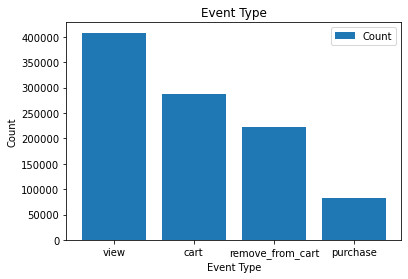

In [122]:
#df["category_code"].value_counts()

# יצירת ברפלוט
plt.bar(df["event_type"].unique(), df["event_type"].value_counts())

# מתן שמות לצירים וכותרת
plt.title("Event Type")
plt.xlabel("Event Type")
plt.ylabel("Count")

# הוספת מקרא על סוג החישוב
plt.legend(["Count"], loc="upper right")

plt.show()


## סעיף 6

In [123]:
def process_group(group):
    
    # אחלץ לתוך משתנה את הנתונים הרלוונטים
    user_id = group['user_id'].iloc[0]
    user_session = group['user_session'].iloc[0] 
    funnel_index = group['funnel_index'].iloc[0]
    # מילון
    event_counts = group['event_type'].value_counts().to_dict()
    # אשלוף את התוצאות לתוך משתנה
    event_count = event_counts.get('view', 0)
    add_to_cart_count = event_counts.get('cart', 0)
    purchase_count = event_counts.get('purchase', 0)
    # אחשב את הזמן
    total_time = group['duration_to_next_event'].sum()
    # יצירת ליסטים
    list_of_viewed = group.loc[group['event_type'] == 'view', 'product_id'].tolist()
    list_of_added_to_cart = group.loc[group['event_type'] == 'cart', 'product_id'].tolist()
    list_of_purchased = group.loc[group['event_type'] == 'purchase', 'product_id'].tolist()
    # הכנסת התוצאות לדאטה פריים :)
    session_data = pd.DataFrame({
        'user_id': user_id,
        'user_session': user_session,
        'funnel_index': funnel_index,
        'event_count': event_count,
        'add_to_cart_count': add_to_cart_count,
        'purchase_count': purchase_count,
        'total_time': total_time,
        'list_of_viewed': [list_of_viewed],
        'list_of_added_to_cart': [list_of_added_to_cart],
        'list_of_purchased': [list_of_purchased]
    })
    
    # אחרי היצירה, אחזיר את הדאטה פריים
    return session_data

# אפעיל את הפונקציה
session_data = df.groupby(['user_id', 'user_session']).apply(process_group).reset_index(drop=True)
# נציג את התוצאה
session_data


,user_id,user_session,funnel_index,event_count,add_to_cart_count,purchase_count,total_time,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,0,0,0.0,[5240],[],[]
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,1,0,0,88998.0,[5814066],[],[]
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,2,28,0,0,65074.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...",[],[]
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,3,1,0,0,0.0,[5711087],[],[]
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,4,1,0,0,4719.0,[5711145],[],[]
...,...,...,...,...,...,...,...,...,...,...
152790,458045796,7343eb65-5f7d-4da4-bff4-29ebcfaeb53b,4,0,0,0,320.0,[],[],[]
152791,458045796,7df46a55-4de3-4346-b1c9-617912f6f7b3,5,3,4,0,372.0,"[5649236, 5861721, 5823778]","[5649236, 5677456, 5823769, 5823779]",[]
152792,458045796,974595e7-70ce-4ec6-ae15-d41b7af06c23,6,0,2,0,44610.0,[],"[5831507, 5840089]",[]
152793,458045796,ba66f747-ab56-4258-b2e8-edfc7427f05f,7,1,0,0,59.0,[5823769],[],[]
